In [1]:
# @TODO 

# - DATA NEEDS TO BE CLEANED, ALL QUERIES NORMALISED FOR AVERAGE SCORES
# - discrepancy between local mongo results and notebook mongo results (amount of score fields) >> #@TODO WHY REPEATED ALL THE TIME? 1 2 1 1 1 


# - wrong heat plot averages

# - check empty scores, not correct in last table? > Remove 3 NaNs
# - check length difference print and display tables

In [2]:
# IDEAS
# - wordcount high score

In [3]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")

result = []
for dbname in client.database_names():
    db = client[dbname]
    for collection in db.collection_names():
        count = db[collection].count()
        result.append({'id': dbname, 'col': collection, 'count': count})
print(result)

# Maartje local
#[{'id': 'Downloads', 'col': 'demo-data', 'count': 1000}, {'id': 'admin', 'col': 'system.users', 'count': 2}, {'id': 'admin', 'col': 'system.version', 'count': 2}, {'id': 'config', 'col': 'system.sessions', 'count': 0}, {'id': 'gothiccsv', 'col': 'set_found', 'count': 2541}, {'id': 'gothiccsv', 'col': 'primarytexts', 'count': 2541}, {'id': 'gothiccsv', 'col': 'csv', 'count': 7373}, {'id': 'gothiccsv', 'col': 'set_all', 'count': 4832}, {'id': 'local', 'col': 'startup_log', 'count': 117}, {'id': 'mptweets', 'col': 'capturedtweets', 'count': 2621}, {'id': 'stepford', 'col': 'Conversion', 'count': 2}, {'id': 'stepford', 'col': 'ProcessedStorySegment', 'count': 2}, {'id': 'stepford', 'col': 'Story', 'count': 2}, {'id': 'stepford', 'col': 'StorySegment', 'count': 3}, {'id': 'stepford', 'col': 'Review', 'count': 5}, {'id': 'stepfordtest', 'col': 'stepfordtest', 'count': 0}]

[{'col': 'system.version', 'id': 'admin', 'count': 1}, {'col': 'system.sessions', 'id': 'config', 'count': 0}, {'col': 'startup_log', 'id': 'local', 'count': 9}, {'col': 'mps', 'id': 'mptweets', 'count': 66}, {'col': 'tweets', 'id': 'mptweets', 'count': 13674}, {'col': 'capturedtweets', 'id': 'mptweets', 'count': 45913}, {'col': 'system.views', 'id': 'stepford', 'count': 1}, {'col': 'Conversion', 'id': 'stepford', 'count': 2}, {'col': 'Review', 'id': 'stepford', 'count': 37}, {'col': 'ProcessedStorySegment', 'id': 'stepford', 'count': 7}, {'col': 'Story', 'id': 'stepford', 'count': 4}, {'col': 'StorySegment', 'id': 'stepford', 'count': 10}, {'col': 'firstview', 'id': 'stepford', 'count': 6}]


In [18]:
# --- imports ---

import pandas as pd
from IPython.display import display, HTML
import numpy as np
import seaborn as sns
import math

In [5]:
# --- mongo connection ---

from pymongo import MongoClient

#client = MongoClient("mongodb://host:port/")
client = MongoClient("mongodb://localhost:27017/")
database = client["stepford"]
collection = database["Review"]


# standard score match

query = {}
projection = {}
projection["scores"] = 1.0
sort = [ (u"scores", 1) ]
cursor = collection.find(query, projection = projection, sort = sort)

results = []
try:
    for doc in cursor:
        #print(doc)
        results.append(doc['scores'])
finally:
    client.close()
    

In [6]:
# --- pandas link ---

# merging each row/list into a dataframe
df = pd.DataFrame(results) # replacing empty strings with None
df = df.replace('', np.nan).astype(float)
print(df)


      0    1    2    3    4    5    6
0   NaN  NaN  3.0  3.0  3.0  NaN  5.0
1   1.0  2.0  4.0  NaN  NaN  NaN  NaN
2   1.0  2.0  5.0  NaN  NaN  NaN  NaN
3   4.0  1.0  2.0  4.0  5.0  NaN  NaN
4   3.0  5.0  1.0  NaN  NaN  NaN  NaN
5   3.0  5.0  1.0  NaN  NaN  NaN  NaN
6   1.0  1.0  5.0  NaN  NaN  NaN  NaN
7   2.0  4.0  1.0  NaN  NaN  NaN  NaN
8   3.0  4.0  1.0  NaN  NaN  NaN  NaN
9   2.0  2.0  1.0  NaN  NaN  NaN  NaN
10  2.0  2.0  1.0  NaN  NaN  NaN  NaN
11  1.0  3.0  1.0  NaN  NaN  NaN  NaN
12  1.0  3.0  1.0  NaN  NaN  NaN  NaN
13  1.0  3.0  2.0  NaN  NaN  NaN  NaN
14  1.0  3.0  2.0  NaN  NaN  NaN  NaN
15  2.0  1.0  1.0  NaN  NaN  NaN  NaN
16  1.0  4.0  5.0  NaN  NaN  NaN  NaN
17  1.0  4.0  5.0  NaN  NaN  NaN  NaN
18  1.0  2.0  2.0  NaN  NaN  NaN  NaN
19  1.0  2.0  2.0  NaN  NaN  NaN  NaN
20  3.0  2.0  3.0  3.0  3.0  5.0  3.0
21  4.0  3.0  5.0  2.0  4.0  3.0  3.0
22  4.0  4.0  4.0  5.0  3.0  5.0  2.0
23  3.0  2.0  3.0  2.0  4.0  3.0  4.0
24  2.0  NaN  NaN  NaN  NaN  NaN  NaN
25  2.0  5.0

### Text ranking analysis

In [51]:
# @TODO WHY SHORTER NOW LONGER than the above? Nested??
# unique: storyid-segmentid

query = {}
cursor = collection.find(query)

scorelist = []
commentlist = []
observationlist = []
segmentlist = []
titlelist = []

try:
    for doc in cursor:
        for i in range(0,len(doc['scores'])):
            if math.isnan( int("0"+str(doc['scores'][i]))):
                continue
            else:
                try:
                    scorelist.append(float("0"+doc['scores'][i] ) )
                except:
                    scorelist.append(0.0) 
                try:
                    commentlist.append(doc['comments'][i])
                except:
                    commentlist.append("Default-Comment")                   
                try:
                    observationlist.append(doc['observations'][i])
                except:
                    observationlist.append("Default-Observation")

                    

        for t in doc['processed_story_segment']:
            titlelist.append(doc['processed_story_segment']['story_segment']['story']['title'])
        for i in doc['processed_story_segment']:
            segmentlist.append(str(doc['processed_story_segment']['story_segment']['story']['story_id'])+'-'+str(doc['processed_story_segment']['story_segment']['story_segment_id']))
  

            
finally:
    client.close()

textdf = pd.DataFrame(list(zip(segmentlist, scorelist, titlelist, observationlist)),columns=['SegmentId', 'Score', 'Title', 'Observations']).sort_values(['Score'])
#textdf['Score'] = textdf['Score'].replace('', np.nan).astype(float)
display(textdf)

#print('segmentid', segmentlist) #@TODO!! just 1
# print('commentlist', commentlist) 

,SegmentId,Score,Title,Observations
21,1-1,0.0,Construction Worker,Female character being described in terms of ...
25,1-1,0.0,Construction Worker,Female character being described in terms of ...
20,1-1,0.0,Construction Worker,Female character being described in terms of ...
0,1-1,1.0,Test Story,Suggests there is a whole world where women h...
90,2-2,1.0,The Time Machine,Female character is described in terms of her...
...,...,...,...,...
14,2-1,5.0,The Ringworld Throne,States that female construction workers are v...
19,1-1,5.0,Construction Worker,Based on an unprovable generalisation.\n ...
29,1-1,5.0,Construction Worker,Female character being described in terms of ...
8,1-1,5.0,Test Story,Suggests that female characters are not capab...


### Initial counts analysis

In [52]:
# What are the frequencies of scores?
#totalcount = pd.DataFrame(df.stack().value_counts()).sort_index()
totalcount = pd.DataFrame(textdf.stack().value_counts()).sort_index()
print(totalcount)

ax = sns.heatmap(totalcount, square=True, cmap="GnBu", annot=True)
ax.invert_yaxis()

TypeError: unorderable types: float() < str()

    SegmentId  Score  scorecounts
0           1    1.0           18
1           1    2.0           14
2           1    3.0           21
3           1    4.0           19
4           1    5.0           15
5           2    1.0            5
6           2    2.0           11
7           2    3.0            4
8           2    4.0            3
9           3    2.0            3
10          3    3.0            3
11          3    4.0            1
12          3    5.0            2


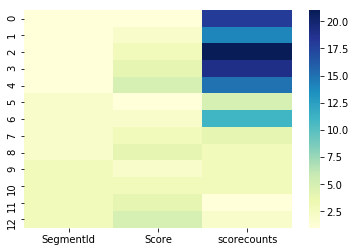

In [9]:
# Grouping and printing score frequencies

textdfcount = textdf.groupby(['SegmentId', 'Score']).size().reset_index(name='scorecounts')
textdfcount = textdfcount[textdfcount['Score'].notna()] # removing 0 vals
print(textdfcount)


sns.heatmap(textdfcount, cmap="YlGnBu", mask=textdfcount.isnull())


In [10]:
# Grouping and printing score frequencies

print(textdf.groupby('Score').describe().unstack(1))


                  Score
SegmentId  count  1.0      23.000000
                  2.0      28.000000
                  3.0      28.000000
                  4.0      23.000000
                  5.0      17.000000
           mean   1.0       1.217391
                  2.0       1.607143
                  3.0       1.357143
                  4.0       1.217391
                  5.0       1.235294
           std    1.0       0.421741
                  2.0       0.685257
                  3.0       0.678467
                  4.0       0.518435
                  5.0       0.664211
           min    1.0       1.000000
                  2.0       1.000000
                  3.0       1.000000
                  4.0       1.000000
                  5.0       1.000000
           25%    1.0       1.000000
                  2.0       1.000000
                  3.0       1.000000
                  4.0       1.000000
                  5.0       1.000000
           50%    1.0       1.000000
              